# SI 618: Final Project


** Data source: https://www.kaggle.com/muonneutrino/us-census-demographic-data#acs2015_county_data.csv **

In [114]:
uniqname = 'shruthis'

In [115]:
import plotly
import plotly.graph_objs as go
import plotly.offline as offline

In [391]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
from scipy.stats import norm
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
import scipy as sp
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import sklearn.ensemble as skens
import sklearn.metrics as skmetric
import sklearn.naive_bayes as sknb
import sklearn.tree as sktree
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='white', color_codes=True, font_scale=1.3)
import sklearn.externals.six as sksix
import IPython.display as ipd
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import os


In [117]:
us_census_df = pd.read_csv('acs2015_county_data.csv')
us_census_df.head()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,...,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,...,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,...,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,...,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7


In [118]:
for column in us_census_df.columns:
#     print(us_census_df_copy[column].dtype)
    if us_census_df[column].dtype == np.float64:
        us_census_df[column] = ((us_census_df[column]/100)*us_census_df["TotalPop"]).round(0)
        try:
            if us_census_df[column].dtype == np.float64:
                us_census_df[column] = us_census_df[column].astype(np.int64)
        except:
            pass
us_census_df.fillna(0)
us_census_df.head()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga,55221,26745,28476,1436,41858,10216,221,...,276,718,994,14634,23986,40643,11541,3037,0,4197
1,1003,Alabama,Baldwin,195121,95314,99807,8780,162146,18536,1171,...,1951,2732,7610,51512,85953,159024,24000,11317,780,14634
2,1005,Alabama,Barbour,26932,14497,12435,1239,12443,12577,54,...,485,404,431,6491,8597,19337,5602,1966,27,4740
3,1007,Alabama,Bibb,22604,12073,10531,497,16840,4837,90,...,136,339,158,6510,8294,17360,3639,1514,90,1876
4,1009,Alabama,Blount,57710,28512,29198,4963,50727,866,173,...,519,231,1327,20141,22189,47322,7791,2424,231,4444


An initial view of the dataset, combined with a review of the original Kaggle site from which the data was retrieved, indicated that columns with a dtype of float64 were percentages of the "TotalPop" column for each row. These columns were therefore converted into int64 types to calculate the total number of invidiuals within each of those columns instead of a percentage, using the above code which multiplies each respective float64 type column by the TotalPop column and divides by 100. These were rounded to contain no decimal points.

In [119]:
us_census_df.shape

(3220, 37)

In [120]:
print("The number of rows of the US census dataset is: ", len(us_census_df))
print("The number of columns of the US census dataset is: ", len(us_census_df.columns))
us_census_df.describe()



The number of rows of the US census dataset is:  3220
The number of columns of the US census dataset is:  37


,CensusId,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
count,3220.000000,3.220000e+03,3.220000e+03,3.220000e+03,3.220000e+03,3.220000e+03,3.220000e+03,3220.000000,3.220000e+03,3220.000000,...,3220.000000,3220.000000,3220.000000,3.220000e+03,3.220000e+03,3.220000e+03,3.220000e+03,3220.000000,3220.000000,3.220000e+03
mean,31393.605280,9.940935e+04,4.889694e+04,5.051241e+04,1.794110e+04,6.126714e+04,1.204628e+04,647.432919,4.986173e+03,145.825776,...,2729.559317,1795.898447,4321.806211,2.579680e+04,4.559352e+04,7.872344e+04,1.447390e+04,6055.174224,162.884472,8.442889e+03
std,16292.078954,3.193055e+05,1.566813e+05,1.626620e+05,1.201847e+05,1.415709e+05,5.281656e+04,2845.706241,3.783085e+04,1791.405539,...,12114.144101,7235.249177,15528.057511,9.375729e+04,1.496995e+05,2.580137e+05,4.011396e+04,23068.132596,528.820734,3.000720e+04
min,1001.000000,8.500000e+01,4.200000e+01,4.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,8.000000e+00,6.200000e+01,2.100000e+01,2.600000e+01,0.000000,0.000000,0.000000e+00
25%,19032.500000,1.121800e+04,5.637250e+03,5.572000e+03,3.110000e+02,7.673500e+03,7.775000e+01,20.000000,2.500000e+01,0.000000,...,256.750000,126.000000,438.000000,2.562000e+03,4.550750e+03,8.157000e+03,1.930000e+03,908.000000,16.000000,8.145000e+02
50%,30024.000000,2.603500e+04,1.293200e+04,1.305700e+04,1.059000e+03,1.925600e+04,6.675000e+02,83.000000,1.180000e+02,0.000000,...,606.500000,358.000000,929.000000,6.212000e+03,1.050800e+04,1.962950e+04,4.374000e+03,1838.500000,55.000000,2.246000e+03
75%,46105.500000,6.643050e+04,3.299275e+04,3.348750e+04,5.230750e+03,5.188400e+04,5.146250e+03,327.250000,6.660000e+02,0.000000,...,1598.500000,1006.000000,2451.750000,1.598700e+04,2.863275e+04,5.119725e+04,1.090100e+04,4249.250000,146.250000,5.763000e+03
max,72153.000000,1.003839e+07,4.945351e+06,5.093037e+06,4.838503e+06,2.700326e+06,1.241025e+06,64290.000000,1.405374e+06,84639.000000,...,337308.000000,230883.000000,511958.000000,3.011516e+06,4.635465e+06,7.930327e+06,1.154415e+06,943608.000000,20077.000000,1.003839e+06


.describe() was used to obtain simple statistical values for each continuous variable in the dataset. A few values of interest are as follows:
* Mean population across all 3220 counties in the US was 99,409.35.
* The average number of women per county is greater than the average number of men, comparing means of 50,512 women/county to 48,897 men/county.
* White, or Caucasian, individuals have the highest mean population per county, with a mean population of 61,267. This is followed by Hispanic individuals, who had a mean population of 17,941.
* The average number of employed individuals per county was 45,593, which was significantly larger than the average number of unemployed individuals per county, or 8,443.

In [121]:
us_census_df['State'].nunique()

52

52 "states" are included in the dataset: all 50 US states, Washington D.C., and Puerto Rico.

In [122]:
us_census_df['W/M_Ratio'] = us_census_df['Women'] / us_census_df['Men']
us_census_df.head()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,W/M_Ratio
0,1001,Alabama,Autauga,55221,26745,28476,1436,41858,10216,221,...,718,994,14634,23986,40643,11541,3037,0,4197,1.064722
1,1003,Alabama,Baldwin,195121,95314,99807,8780,162146,18536,1171,...,2732,7610,51512,85953,159024,24000,11317,780,14634,1.047139
2,1005,Alabama,Barbour,26932,14497,12435,1239,12443,12577,54,...,404,431,6491,8597,19337,5602,1966,27,4740,0.857764
3,1007,Alabama,Bibb,22604,12073,10531,497,16840,4837,90,...,339,158,6510,8294,17360,3639,1514,90,1876,0.872277
4,1009,Alabama,Blount,57710,28512,29198,4963,50727,866,173,...,231,1327,20141,22189,47322,7791,2424,231,4444,1.024060


In [123]:
us_census_df['W/M_Ratio'].mean()

1.003536359668398

In [124]:
us_census_df.sort_values(by=['W/M_Ratio'], ascending=False).head()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,W/M_Ratio
2939,51720,Virginia,Norton city,4007,1626,2381,96,3470,136,4,...,0,60,581,1811,3254,657,96,0,445,1.464330
502,13235,Georgia,Pulaski,11590,4866,6724,545,6850,3894,0,...,23,220,2469,3949,8032,2793,753,12,858,1.381833
59,1119,Alabama,Sumter,13341,5905,7436,53,3309,9659,53,...,40,267,3242,4416,9485,3175,680,0,2241,1.259272
1463,28125,Mississippi,Sharkey,4805,2139,2666,29,1331,3426,0,...,14,19,961,1678,3445,1129,226,5,1062,1.246377
2926,51620,Virginia,Franklin city,8457,3766,4691,85,3231,4956,0,...,34,296,2047,3429,5404,2444,533,76,1159,1.245619


The average ratio of Women to Men per county is 1.0035, indicating an approximately equal ratio between populations of Women and Men. The county with the highest such ratio is Norton City, Virginia.

In [125]:
total_pop = us_census_df['TotalPop'].sum()
total_pop

320098094

The Total Population of the United States, as estimated by summing the "TotalPop" column in this dataset, is 320,098,094.

### Question 1: What are the ratios of populations of Women to Men  throughout the US? ###
* What is the distribution of this ratio at the county level? 
* What are the 5 states with the highest ratios? What job types are more common in these states?
* What states have more men than women overall?
* What job types are more common in states with higher populations of men?


In [186]:
# state_grouping = us_census_df.groupby('State', as_index=False).sum()
# state_grouping

# group by state 
state_grouping = us_census_df.groupby('State', as_index=False).sum()

# order by total population 
state_grouping = state_grouping.sort_values('TotalPop', ascending = 0)
state_grouping


,State,CensusId,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,...,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,W/M_Ratio
4,California,351364,38421464,19087135,19334329,14746536,14878726,2157960,144702,5192712,...,958351,2026871,10721893,17246360,29786224,5395291,3179154,77210,3845642,56.728489
44,Texas,12256516,26538614,13171316,13367298,10194835,11636314,3073823,68306,1108449,...,460665,1070756,6757182,12094262,20978458,3745535,1771673,39333,1879389,247.511439
32,New York,2235844,19673174,9541801,10131373,3617638,11169071,2831156,44124,1558401,...,366002,762669,6378487,9254578,15399570,3093912,1157679,24544,1631487,62.676978
9,Florida,808550,19645772,9600009,10045763,4662131,11013330,3033830,41318,499744,...,439184,1006785,5176002,8541291,15975558,2476228,1162703,30613,1912550,64.001952
13,Illinois,1744404,12873761,6316899,6556862,2120791,8043134,1821206,14631,640259,...,213741,539098,3642511,6086226,10645432,1608000,604331,17752,1167326,102.121036
38,Pennsylvania,2818489,12779559,6245344,6534215,815247,9979059,1347728,15155,389525,...,180328,505433,3371133,6001889,10708488,1395675,657237,18479,1018489,67.328942
35,Ohio,3439744,11575977,5662893,5913084,390591,9291064,1393790,16995,215479,...,130144,405373,2696489,5366673,9524648,1456036,578803,16511,948640,89.476450
10,Georgia,2092677,10006693,4883331,5123362,914552,5460392,3054277,18750,358386,...,159441,470377,2718481,4388274,7876499,1558299,553097,17250,970191,162.619466
22,Michigan,2164889,9900571,4861973,5038598,465629,7512845,1366282,47757,268972,...,127958,357704,2394763,4373518,8280695,1104537,499422,16439,990833,81.925568
33,North Carolina,3710000,9845333,4795408,5049925,869617,6324238,2084966,108459,242439,...,129023,446698,2352041,4372773,7759720,1498115,573363,16634,937751,103.574375


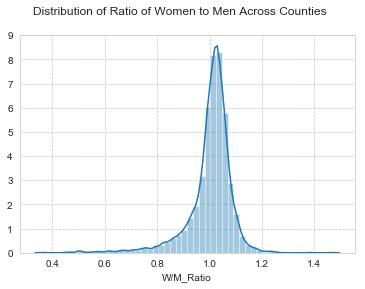

count    3220.000000
mean        1.003536
std         0.085744
min         0.365700
25%         0.981505
50%         1.018799
75%         1.048292
max         1.464330
Name: W/M_Ratio, dtype: float64

In [189]:
# poke_type = pokemon_df[pokemon_df['Type 1'] == type]
ratios = sns.distplot(us_census_df['W/M_Ratio'])
plt.suptitle("Distribution of Ratio of Women to Men Across Counties ")
plt.show()
us_census_df["W/M_Ratio"].describe()

In [190]:
state_grouping['W/M_Ratio'] = state_grouping['Women'] / state_grouping['Men']
top_states = state_grouping.sort_values('W/M_Ratio', ascending = 0).head()
top_states

,State,CensusId,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,...,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,W/M_Ratio
8,District of Columbia,11001,647484,306674,340810,66043,230504,310792,1295,23309,...,33669,32374,192303,337815,453239,164461,28489,647,62158,1.111310
39,Puerto Rico,5621983,3583073,1713860,1869213,3547282,24871,2667,5,2659,...,66736,74776,1053330,1063350,2420293,839696,317776,5975,657447,1.090645
7,Delaware,30009,926454,448413,478041,80657,591726,195086,2738,33322,...,10508,38795,236227,433816,752222,136049,36917,1266,71497,1.066073
20,Maryland,577079,5930538,2872643,3057895,533576,3144715,1723689,11242,354339,...,74929,248813,1904295,2976504,4324483,1317331,281560,7422,443835,1.064488
40,Rhode Island,220025,1053661,510388,543273,143598,785474,56451,3863,33644,...,15956,36381,254550,518170,868443,133147,51548,1201,90559,1.064431


[Text(0,0,'Norton city, Virginia'),
 Text(0,0,'Pulaski, Georgia'),
 Text(0,0,'Sumter, Alabama'),
 Text(0,0,'Sharkey, Mississippi'),
 Text(0,0,'Franklin city, Virginia')]

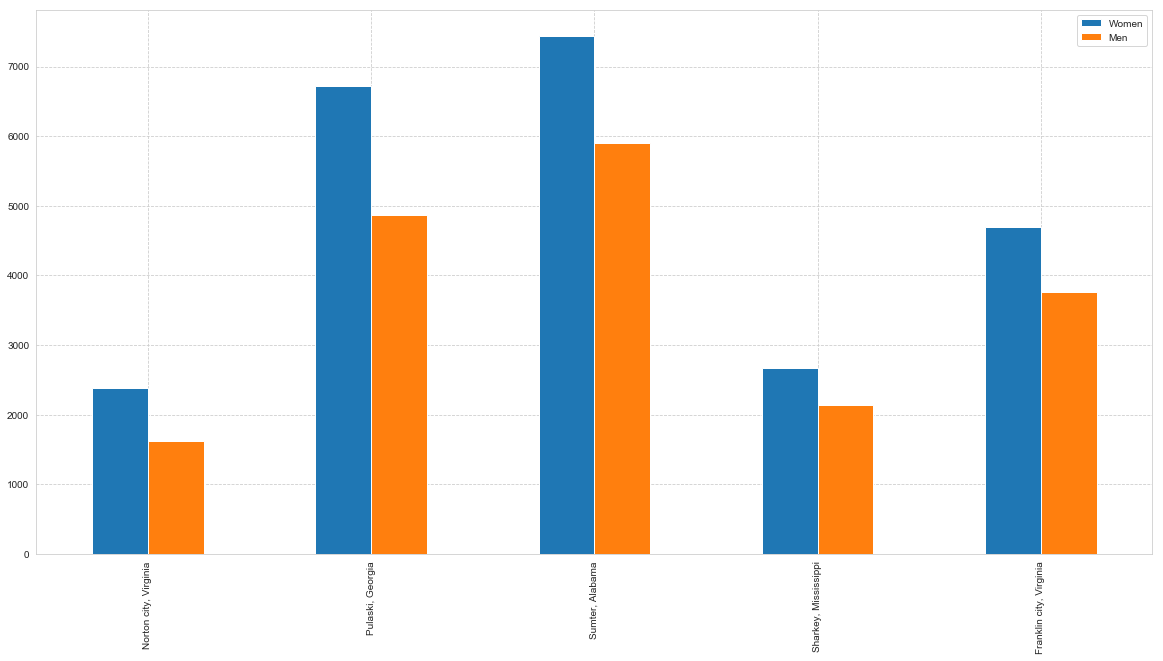

In [367]:

top_counties = us_census_df.sort_values('W/M_Ratio', ascending = 0).head()
top_counties
gender_subset = top_counties[['State', 'Women', 'Men']].head()
gender_subset

p1 = gender_subset.plot.bar(figsize=(20,10))
p1.set_xticklabels(top_counties["County"] + ", " + top_counties['State'], rotation=90)

In [191]:
top_5_states = []
for item in top_states['State']:
    top_5_states.append(item)
top_5_states

['District of Columbia', 'Puerto Rico', 'Delaware', 'Maryland', 'Rhode Island']

In [212]:
dc_=top_states[["Professional", "Service", "Office", "Construction", "Production"]].values[top_states['State'] == "District of Columbia"]
dc_values = dc_.reshape(-1, 1).tolist()
pr_=top_states[["Professional", "Service", "Office", "Construction", "Production"]].values[top_states['State'] == "Puerto Rico"]
pr_values = pr_.reshape(-1, 1).tolist()
dl_=top_states[["Professional", "Service", "Office", "Construction", "Production"]].values[top_states['State'] == "Delaware"]
dl_values = dl_.reshape(-1, 1).tolist()
mr_=top_states[["Professional", "Service", "Office", "Construction", "Production"]].values[top_states['State'] == "Maryland"]
mr_values = mr_.reshape(-1, 1).tolist()
ri_=top_states[["Professional", "Service", "Office", "Construction", "Production"]].values[top_states['State'] == "Rhode Island"]
ri_values = ri_.reshape(-1, 1).tolist()
# ri_values

all_values = [dc_values, pr_values, dl_values, mr_values, ri_values]
all_values



[[[394318], [98418], [112662], [18777], [23957]],
 [[1121557], [746587], [979695], [355845], [379332]],
 [[352804], [172184], [223593], [79808], [98613]],
 [[2624460], [1026315], [1342455], [465818], [471880]],
 [[387534], [213041], [257275], [76167], [119644]]]

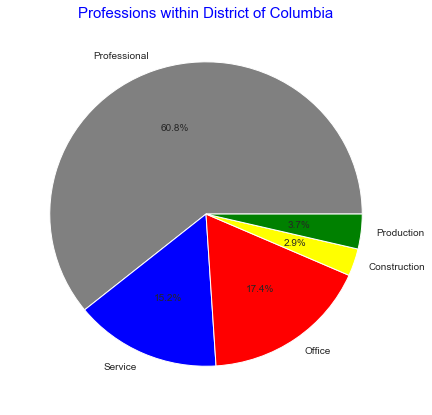

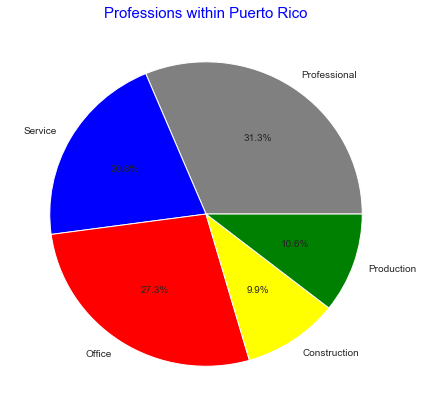

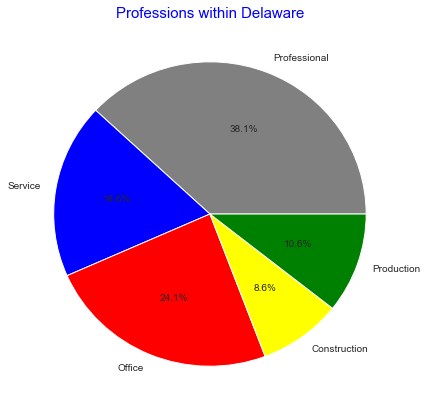

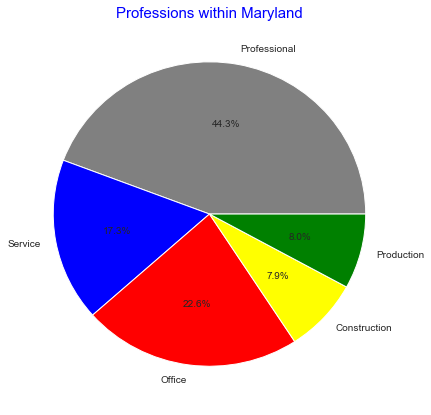

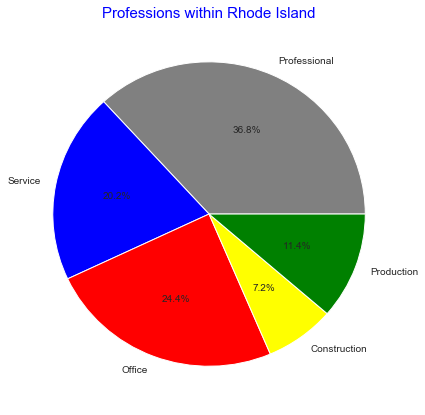

In [213]:
for i in range(5):
    labels = ['Professional', 'Service', 'Office', "Construction", "Production"]
    labels
    colors = ['grey','blue','red','yellow','green']
    explode = [0,0,0,0,0]
    sizes = all_values[i]

    # visual
    plt.figure(figsize = (7,7))
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
    plt.title('Professions within ' + top_5_states[i] ,color = 'blue',fontsize = 15)



In [215]:
bottom_states = state_grouping.query('Men > Women').sort_values('W/M_Ratio').head()
bottom_states

# state_grouping.sort_values('W/M_Ratio', ascending = 0).head()
# top_states

,State,CensusId,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,...,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,W/M_Ratio
1,Alaska,62340,733375,384160,349215,47870,457454,23626,98390,42337,...,45051,33896,140383,351108,498221,187638,46175,1359,61943,0.909035
34,North Dakota,2016809,721640,367963,353677,20535,628141,11655,37623,8745,...,8507,37430,124435,387716,537700,121464,60296,2281,21033,0.961175
51,Wyoming,1288529,579679,295561,284118,55775,489683,5939,11033,5179,...,12216,25977,106736,293949,417677,123351,37218,1409,28266,0.961284
11,Hawaii,75025,1406299,709871,696428,138600,322411,27136,1858,516779,...,49647,65226,375483,653284,1014739,290424,97304,2654,85487,0.981063
28,Nevada,544774,2798636,1407735,1390901,769963,1455067,225584,24208,210728,...,60256,91566,671256,1267312,2307103,348286,142202,3068,293737,0.988042


In [216]:
bottom_5_states = []
for item in bottom_states['State']:
    bottom_5_states.append(item)
bottom_5_states

['Alaska', 'North Dakota', 'Wyoming', 'Hawaii', 'Nevada']

In [219]:
al_=bottom_states[["Professional", "Service", "Office", "Construction", "Production"]].values[bottom_states['State'] == "Alaska"]
al_values = al_.reshape(-1, 1).tolist()
nd_=bottom_states[["Professional", "Service", "Office", "Construction", "Production"]].values[bottom_states['State'] == "North Dakota"]
nd_values = nd_.reshape(-1, 1).tolist()
wy_=bottom_states[["Professional", "Service", "Office", "Construction", "Production"]].values[bottom_states['State'] == "Wyoming"]
wy_values = wy_.reshape(-1, 1).tolist()
hi_=bottom_states[["Professional", "Service", "Office", "Construction", "Production"]].values[bottom_states['State'] == "Hawaii"]
hi_values = hi_.reshape(-1, 1).tolist()
nv_=bottom_states[["Professional", "Service", "Office", "Construction", "Production"]].values[bottom_states['State'] == "Nevada"]
nv_values = nv_.reshape(-1, 1).tolist()
# ri_values

all_5_values = [al_values, nd_values, wy_values, hi_values, nv_values]
all_5_values

[[[264786], [128838], [166775], [92913], [80168]],
 [[252377], [122791], [161501], [95632], [89356]],
 [[188723], [102523], [123285], [93048], [72195]],
 [[478983], [319521], [348703], [137629], [121464]],
 [[774224], [778097], [726634], [246015], [273669]]]

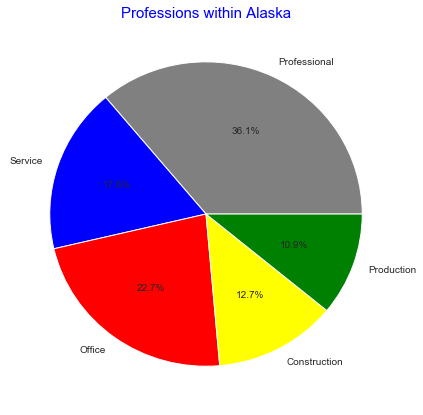

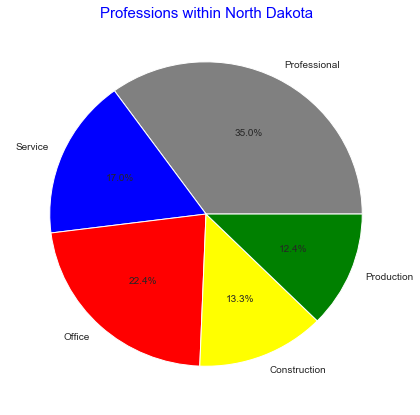

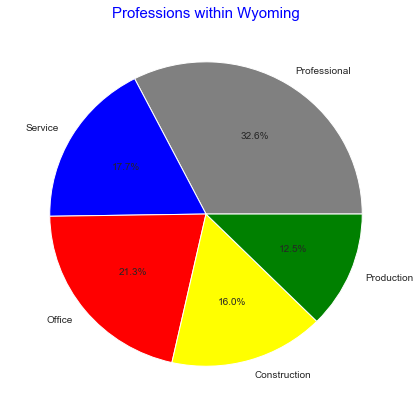

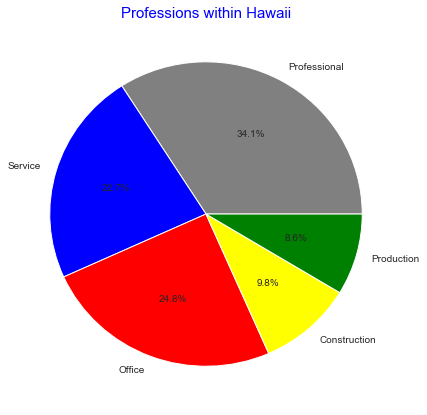

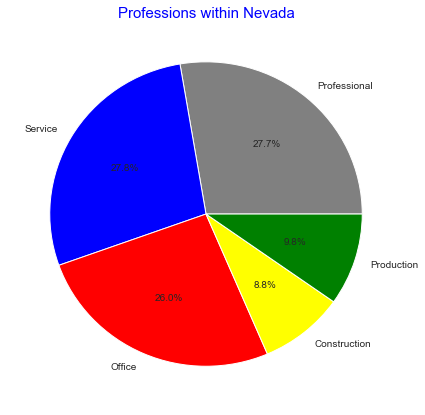

In [220]:
for i in range(5):
    labels = ['Professional', 'Service', 'Office', "Construction", "Production"]
    labels
    colors = ['grey','blue','red','yellow','green']
    explode = [0,0,0,0,0]
    sizes = all_5_values[i]

    # visual
    plt.figure(figsize = (7,7))
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
    plt.title('Professions within ' + bottom_5_states[i] ,color = 'blue',fontsize = 15)

### Question 2: Of the 6 races included in the dataset, what is the distribution of race by state? ###
* What percentage of the total US population can be attributed to each race?
* What is the breakdown of each state's total population by race?
* What is the correlation between different races and different profession types?

In [226]:
total_hispanic = us_census_df['Hispanic'].sum()
total_white = us_census_df['White'].sum()
total_black = us_census_df['Black'].sum()
total_native = us_census_df['Native'].sum()
total_asian = us_census_df['Asian'].sum()
total_pacific = us_census_df['Pacific'].sum()
total_races = [total_hispanic, total_white, total_black, total_native,total_asian, total_pacific]

Text(0.5,1,'Distribution of Race within the US')

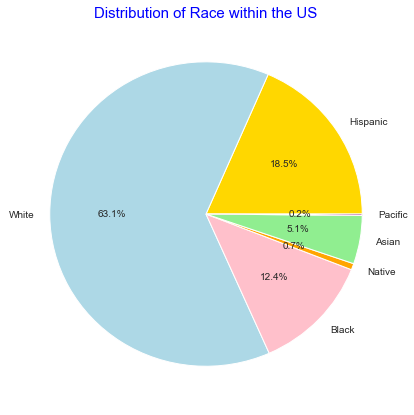

In [240]:
labels = ['Hispanic', 'White', 'Black', "Native", "Asian", "Pacific"]
colors = ['gold','lightblue','pink','orange','lightgreen', 'purple']
explode = [0,0,0,0,0,0]
sizes = total_races
# visual
plt.figure(figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Distribution of Race within the US',color = 'blue',fontsize = 15)

In [241]:
unclean_census_df = pd.read_csv('acs2015_county_data.csv')
unclean_census_df.head()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,...,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,...,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,...,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,...,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7


[Text(0,0.5,'States'),
 Text(0.5,0,'Percentage of Races'),
 Text(0.5,1,"Percentage of State's Population According to Races ")]

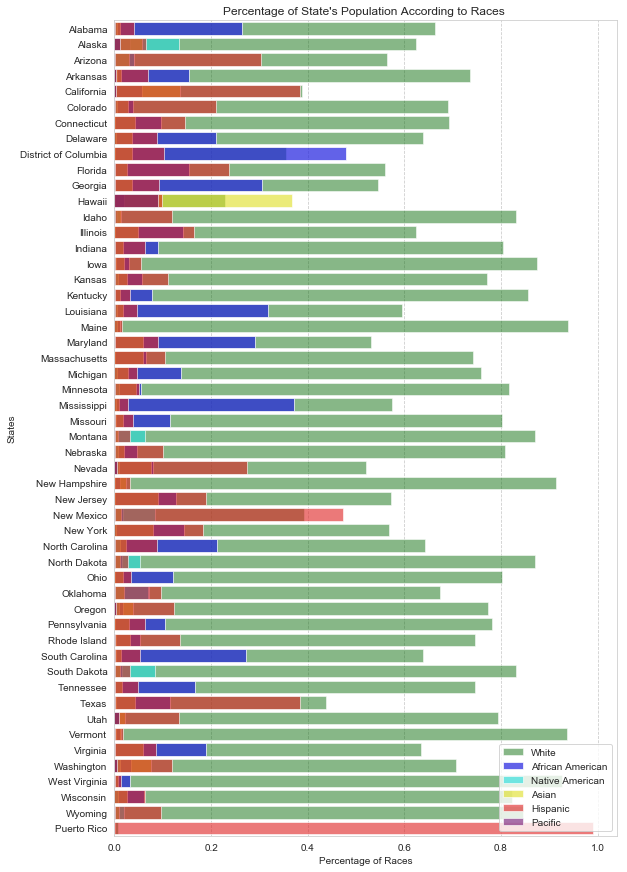

In [337]:
# # Percentage of state's population according to races that are black,white,native american, asian and hispanic

area_list = list(us_census_df['State'].unique())
share_white = []
share_black = []
share_native_american = []
share_asian = []
share_hispanic = []
share_pacific = []
for i in area_list:
    x = us_census_df[us_census_df['State']==i]
    share_white.append(sum(x.White)/sum(x.TotalPop))
    share_black.append(sum(x.Black) / sum(x.TotalPop))
    share_native_american.append(sum(x.Native) / sum(x.TotalPop))
    share_asian.append(sum(x.Asian) / sum(x.TotalPop))
    share_hispanic.append(sum(x.Hispanic) / sum(x.TotalPop))
    share_pacific.append(sum(x.Pacific) / sum(x.TotalPop))

# visualization
f,ax = plt.subplots(figsize = (9,15))
sns.barplot(x=share_white,y=area_list,color='green',alpha = 0.5,label='White' )
sns.barplot(x=share_black,y=area_list,color='blue',alpha = 0.7,label='African American')
sns.barplot(x=share_native_american,y=area_list,color='cyan',alpha = 0.6,label='Native American')
sns.barplot(x=share_asian,y=area_list,color='yellow',alpha = 0.6,label='Asian')
sns.barplot(x=share_hispanic,y=area_list,color='red',alpha = 0.6,label='Hispanic')
sns.barplot(x=share_pacific,y=area_list,color='purple',alpha = 0.6,label='Pacific')


ax.legend(loc='lower right',frameon = True)
ax.set(xlabel='Percentage of Races', ylabel='States',title = "Percentage of State's Population According to Races ")



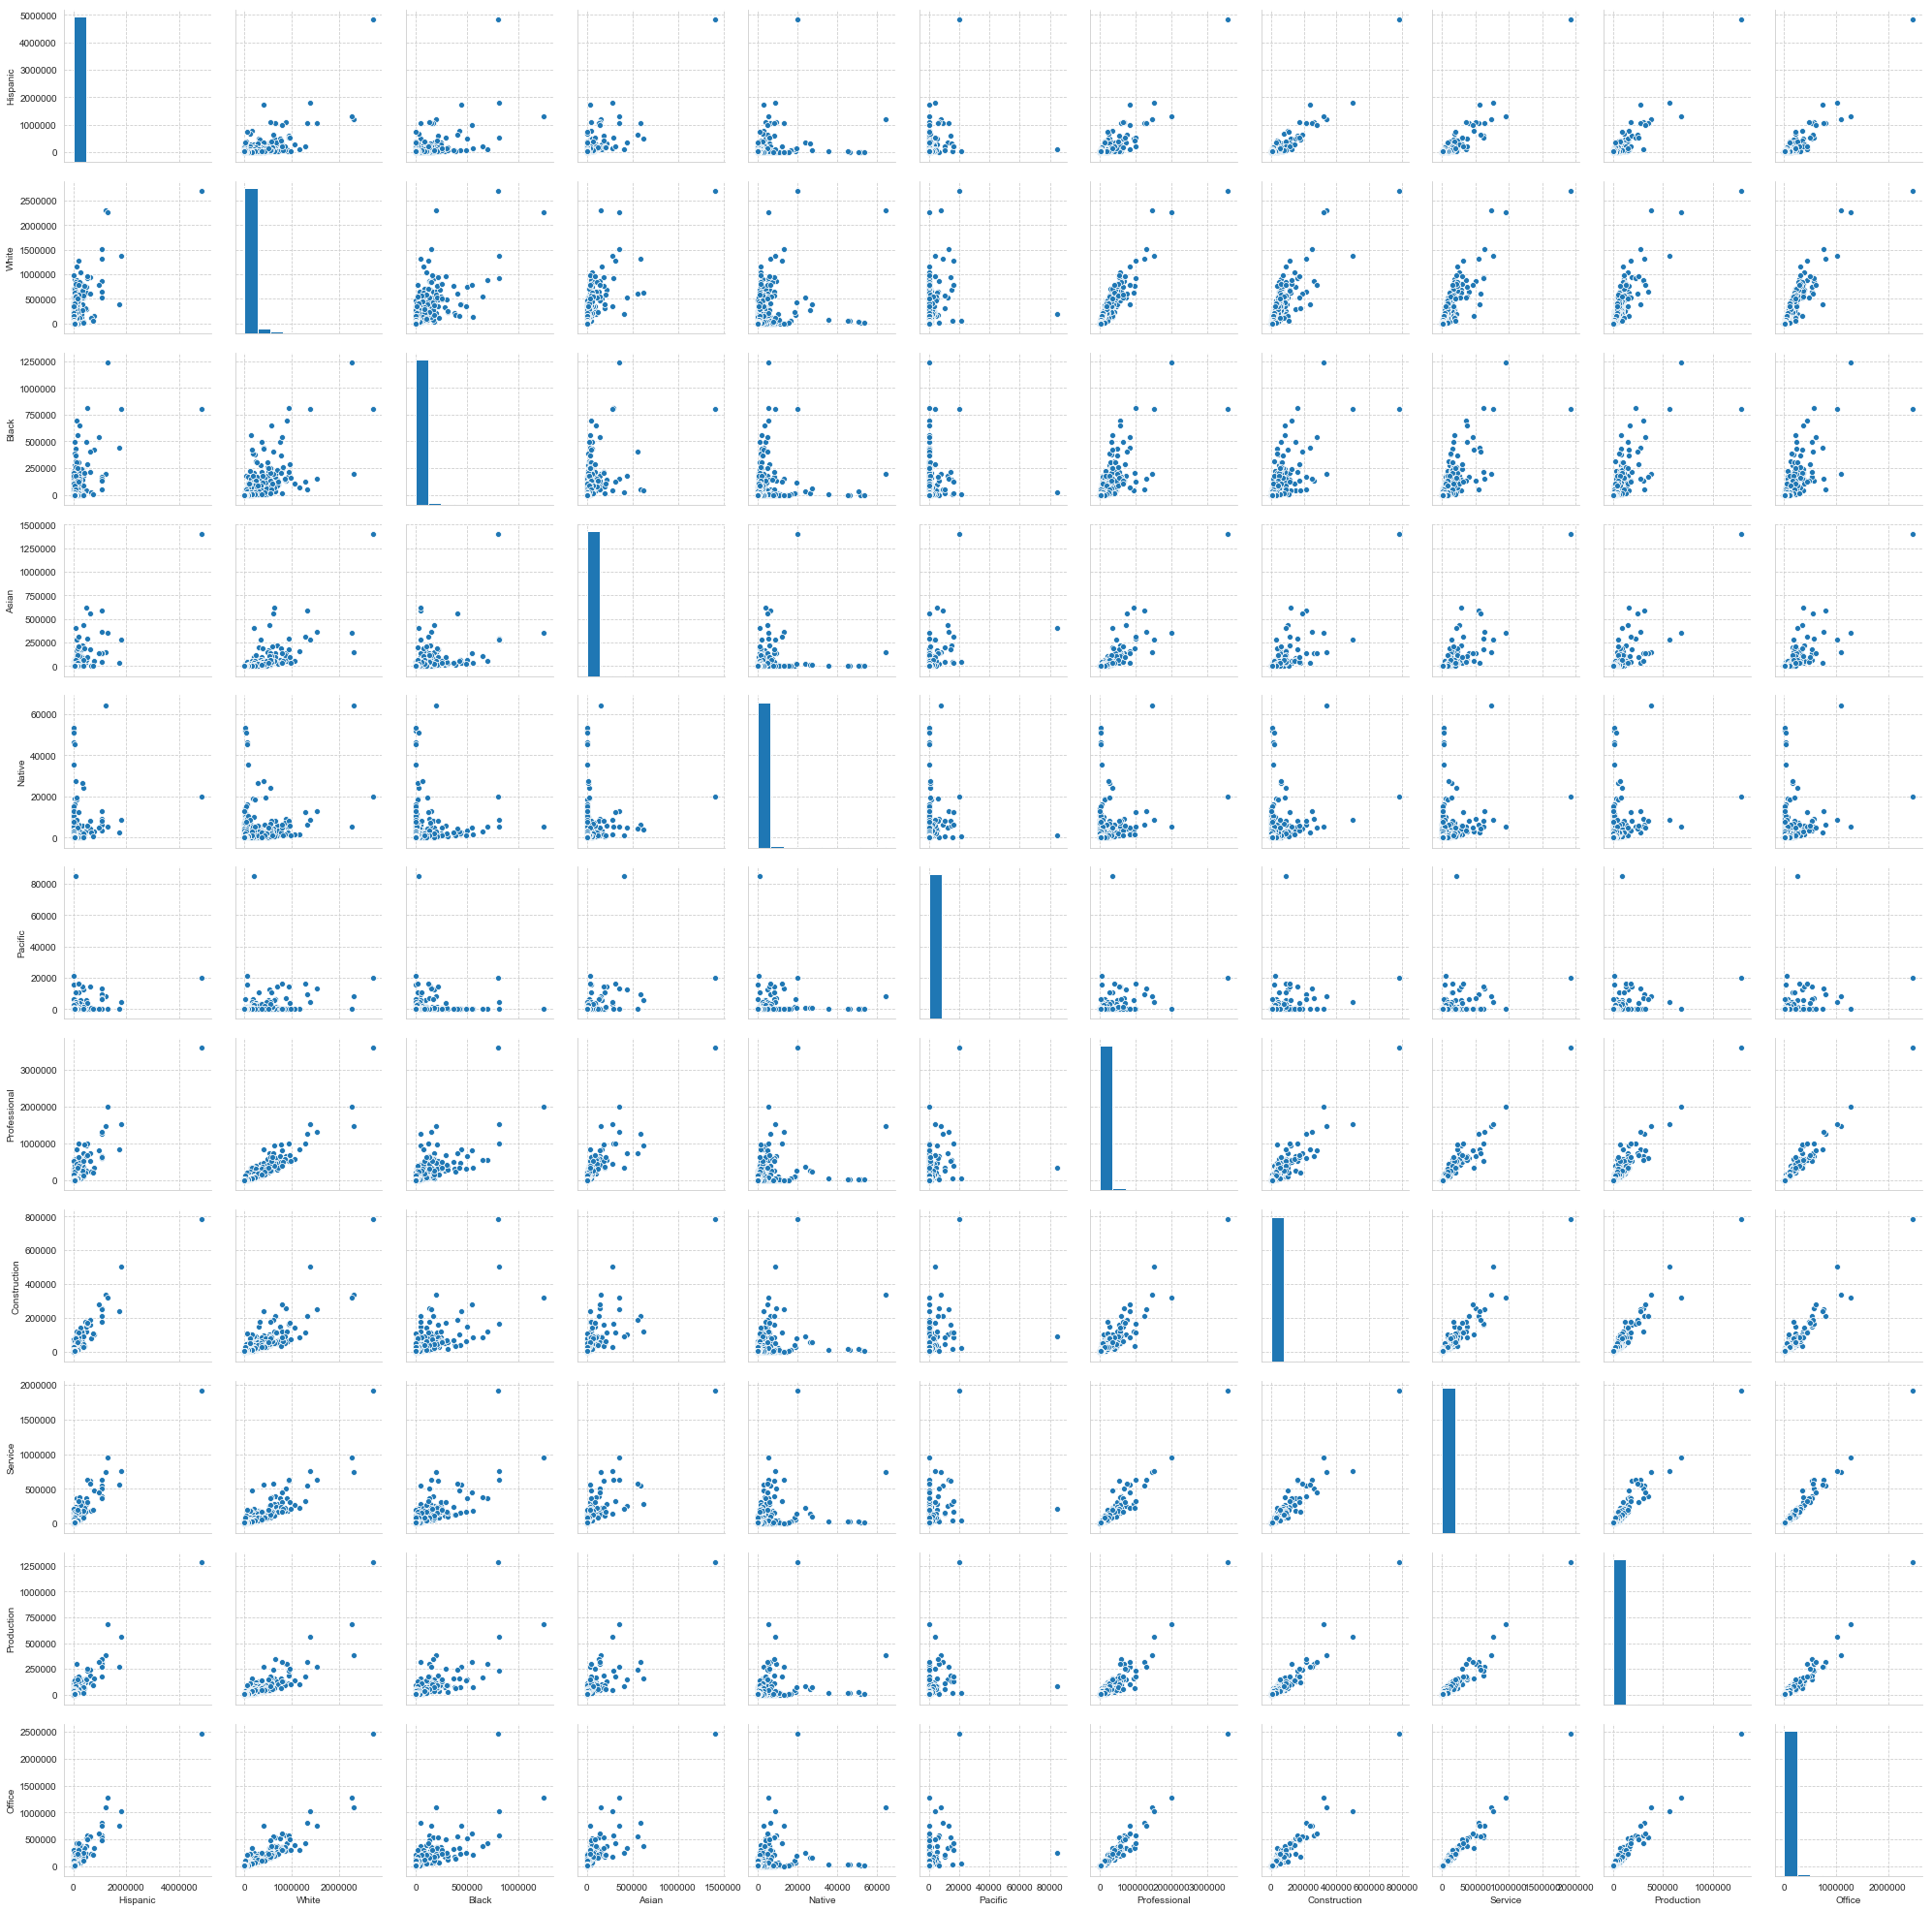

In [255]:
numeric_cols = ['Hispanic', 'White', 'Black', 'Asian', 'Native', "Pacific", "Professional", "Construction", "Service", "Production", "Office"]

sns.pairplot(us_census_df[numeric_cols])
del numeric_cols

### Question 3: What is the correlation between income (or indicators of income) and poverty level in each state? ###
* Are there any trends in poverty level per state compared to unemployment levels per state?
* What are the correlations between variables related to income, poverty level, employment, and method of commuting to work?

In [335]:

state_list = list(state_grouping['State'].unique())
state_grouping["Poverty Ratio"] = (state_grouping['Poverty']/state_grouping['TotalPop'])*100
state_grouping["Unemployment Ratio"] = (state_grouping["Unemployment"]/state_grouping["TotalPop"])*100
# state_grouping
pov_sorting = state_grouping.sort_values("Poverty Ratio")
list_pov_ratio = list(pov_sorting['Poverty Ratio'])
list_unemp_ratio = list(pov_sorting['Unemployment Ratio'])
state_list = list(pov_sorting['State'].unique())

# list_pov_ratio
# list_unemp_ratio


# f,ax1 = plt.subplots(figsize =(20,10))
# sns.pointplot(x=state_list,y=list_pov_ratio,data=pov_sorting,color='lime',alpha=0.8)
# sns.pointplot(x=state_list,y=list_unemp_ratio,data=pov_sorting,color='red',alpha=0.8)
# plt.text(40,0.6,'Poverty ratio',color='red',fontsize = 17,style = 'italic')
# plt.text(40,0.55,'Unemployment ratio',color='lime',fontsize = 18,style = 'italic')
# plt.xlabel('States',fontsize = 15,color='blue')
# plt.ylabel('Values',fontsize = 15,color='blue')
# plt.title('Poverty Rates vs. Unemployments per State',fontsize = 20,color='blue')
# plt.grid()
# plt.xticks(rotation=90)

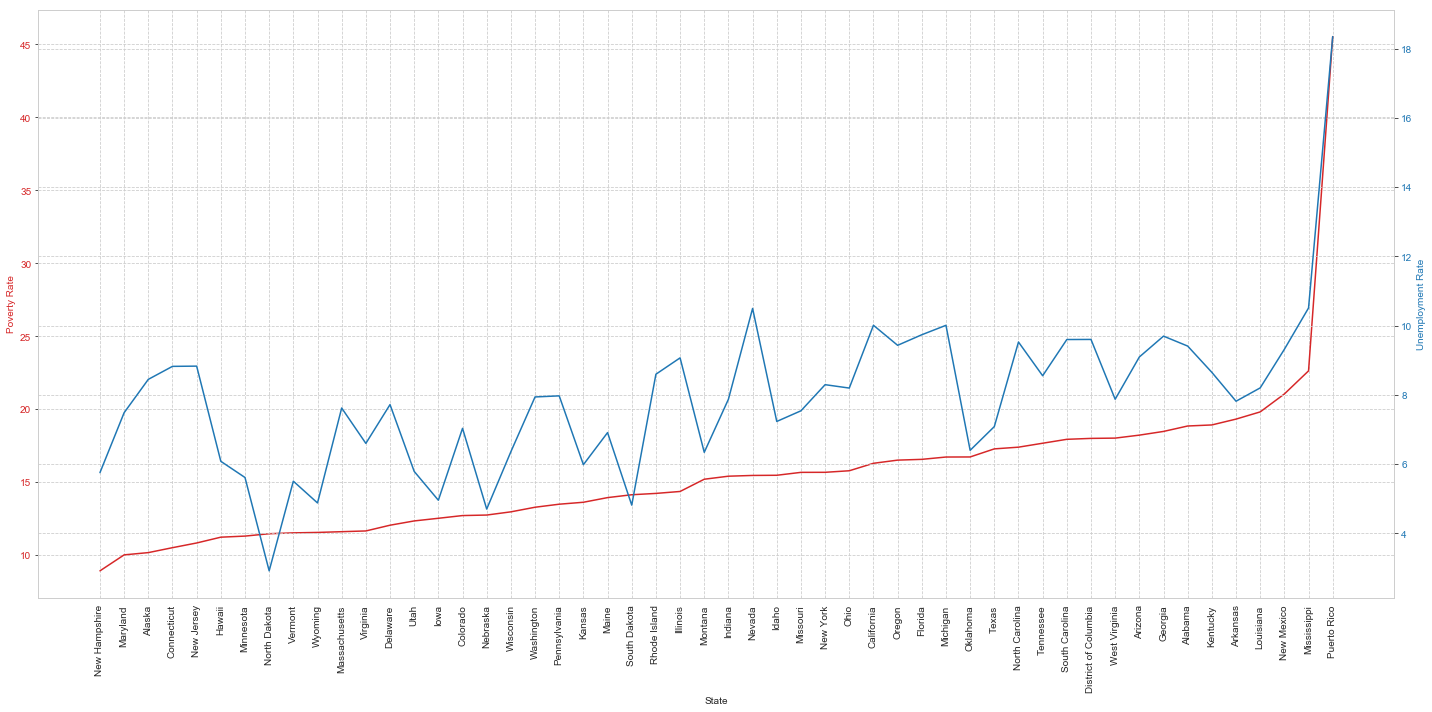

In [336]:
t = state_list

# sns.pointplot(x=state_list,y=list_pov_ratio,data=pov_sorting,color='lime',alpha=0.8)
# sns.pointplot(x=state_list,y=list_unemp_ratio,data=pov_sorting,color='red',alpha=0.8)
data1 = list_pov_ratio
data2 = list_unemp_ratio

fig, ax1 = plt.subplots(figsize = (20,10))

color = 'tab:red'
ax1.set_xlabel('State')
ax1.set_ylabel('Poverty Rate', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(t, rotation=90)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Unemployment Rate', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
# plt.xticks(rotation=90)
plt.show()


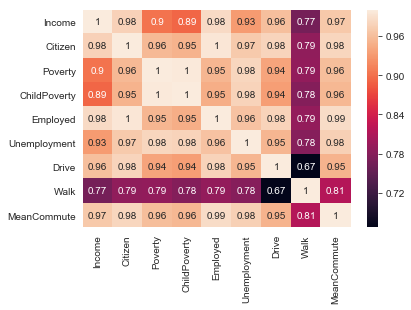

In [332]:
income_df = us_census_df[['Income', 'Citizen', 'Poverty', 'ChildPoverty', 'Employed', 'Unemployment', 'Drive', 'Walk', 'MeanCommute']]
income_df
var_Corr = income_df.corr()
# plot the heatmap and annotation on it
sns.heatmap(var_Corr, xticklabels=var_Corr.columns, yticklabels=var_Corr.columns, annot=True)


### Question 4: What is the correlation between citizenship and different types of jobs? ###
* What is the top job type in the US?
* What is the distribution of each job type in the US?
* For states with the lowest counts of citizenship, are there any trends in the most common job types? For states with the highest counts of citizenship?
* What, if any, is the correlation between employment type and job type?

In [413]:
# total_job = [sum(state_grouping["Professional"]), sum(state_grouping['Office'])]
list_of_jobs = ['State', 'Professional', 'Office', 'Production', 'Service', 'Construction']
total_professional = us_census_df['Professional'].sum()
total_office = us_census_df['Office'].sum()
total_production = us_census_df['Production'].sum()
total_service = us_census_df['Service'].sum()
total_construction = us_census_df['Construction'].sum()
total_jobs = [total_professional, total_office, total_production, total_service,total_construction]
total_jobs

[115460127, 77227745, 39483920, 58686704, 29244742]

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

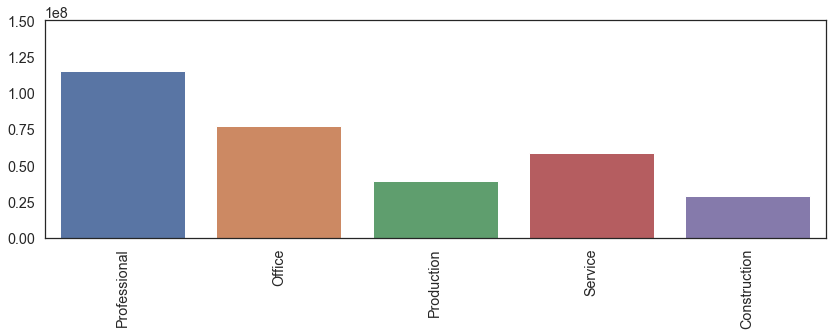

In [425]:
fig, ax = plt.subplots(figsize=(14,4))
fig = sns.barplot(x=list_of_jobs[1:], y=total_jobs)
fig.axis(ymin=0, ymax=150000000)
plt.xticks(rotation=90)

# df2.plot.bar(stacked=True)

[Text(0,0,'California'),
 Text(0,0,'Texas'),
 Text(0,0,'New York'),
 Text(0,0,'Florida'),
 Text(0,0,'Illinois'),
 Text(0,0,'Pennsylvania'),
 Text(0,0,'Ohio'),
 Text(0,0,'Georgia'),
 Text(0,0,'Michigan'),
 Text(0,0,'North Carolina'),
 Text(0,0,'New Jersey'),
 Text(0,0,'Virginia'),
 Text(0,0,'Washington'),
 Text(0,0,'Massachusetts'),
 Text(0,0,'Arizona'),
 Text(0,0,'Indiana'),
 Text(0,0,'Tennessee'),
 Text(0,0,'Missouri'),
 Text(0,0,'Maryland'),
 Text(0,0,'Wisconsin'),
 Text(0,0,'Minnesota'),
 Text(0,0,'Colorado'),
 Text(0,0,'Alabama'),
 Text(0,0,'South Carolina'),
 Text(0,0,'Louisiana'),
 Text(0,0,'Kentucky'),
 Text(0,0,'Oregon'),
 Text(0,0,'Oklahoma'),
 Text(0,0,'Connecticut'),
 Text(0,0,'Puerto Rico'),
 Text(0,0,'Iowa'),
 Text(0,0,'Mississippi'),
 Text(0,0,'Arkansas'),
 Text(0,0,'Utah'),
 Text(0,0,'Kansas'),
 Text(0,0,'Nevada'),
 Text(0,0,'New Mexico'),
 Text(0,0,'Nebraska'),
 Text(0,0,'West Virginia'),
 Text(0,0,'Idaho'),
 Text(0,0,'Hawaii'),
 Text(0,0,'Maine'),
 Text(0,0,'New Hampsh

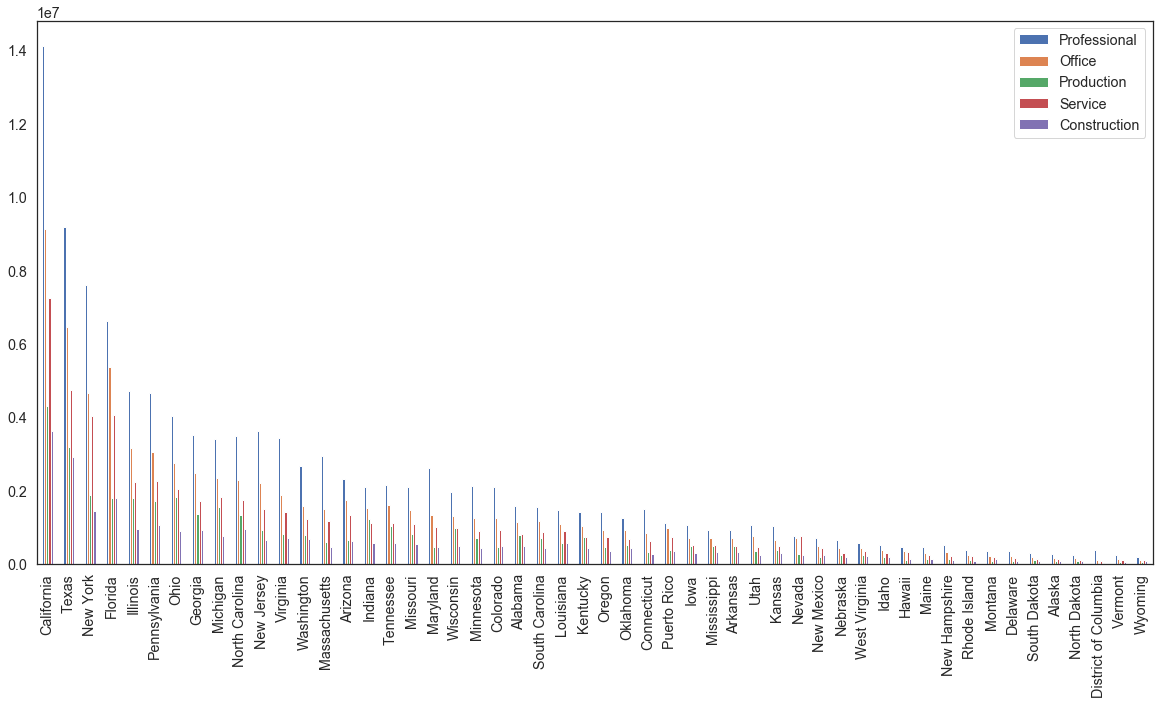

In [411]:
job_subset = state_grouping[['State', 'Professional', 'Office', 'Production', 'Service', 'Construction']]
# job_subset

p1 = job_subset.plot.bar(figsize=(20,10))
p1.set_xticklabels(job_subset["State"], rotation=90)

In [429]:
top_citizen = state_grouping.sort_values('Citizen', ascending = 0).head()
top_citizen
# gender_subset = top_counties[['State', 'Women', 'Men']].head()
# gender_subset



,State,CensusId,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,...,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,W/M_Ratio,Poverty Ratio,Unemployment Ratio
4,California,351364,38421464,19087135,19334329,14746536,14878726,2157960,144702,5192712,...,10721893,17246360,29786224,5395291,3179154,77210,3845642,1.012951,16.294267,10.009098
44,Texas,12256516,26538614,13171316,13367298,10194835,11636314,3073823,68306,1108449,...,6757182,12094262,20978458,3745535,1771673,39333,1879389,1.014879,17.281438,7.081715
9,Florida,808550,19645772,9600009,10045763,4662131,11013330,3033830,41318,499744,...,5176002,8541291,15975558,2476228,1162703,30613,1912550,1.046433,16.564139,9.735174
32,New York,2235844,19673174,9541801,10131373,3617638,11169071,2831156,44124,1558401,...,6378487,9254578,15399570,3093912,1157679,24544,1631487,1.061788,15.676372,8.292953
38,Pennsylvania,2818489,12779559,6245344,6534215,815247,9979059,1347728,15155,389525,...,3371133,6001889,10708488,1395675,657237,18479,1018489,1.046254,13.492218,7.969673


In [430]:
top_5_citizen = []
for item in top_citizen['State']:
    top_5_citizen.append(item)
top_5_citizen

['California', 'Texas', 'Florida', 'New York', 'Pennsylvania']

In [431]:
bottom_citizen = state_grouping.sort_values('Citizen').head()
bottom_5_citizen = []
for item in bottom_citizen['State']:
    bottom_5_citizen.append(item)
bottom_5_citizen


['Wyoming', 'District of Columbia', 'Vermont', 'Alaska', 'North Dakota']

[Text(0,0,'California'),
 Text(0,0,'Texas'),
 Text(0,0,'Florida'),
 Text(0,0,'New York'),
 Text(0,0,'Pennsylvania')]

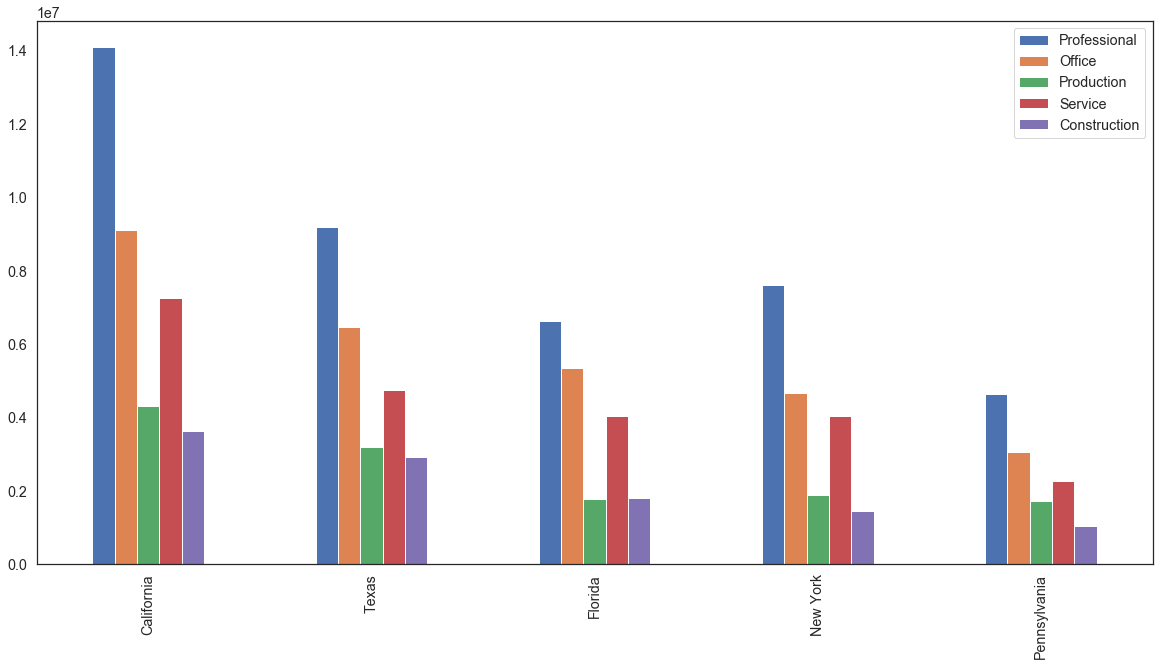

In [433]:
top_job_cit = top_citizen[['State', 'Professional', 'Office', 'Production', 'Service', 'Construction']]
# job_subset

p1 = top_job_cit.plot.bar(figsize=(20,10))
p1.set_xticklabels(top_job_cit["State"], rotation=90)

[Text(0,0,'Wyoming'),
 Text(0,0,'District of Columbia'),
 Text(0,0,'Vermont'),
 Text(0,0,'Alaska'),
 Text(0,0,'North Dakota')]

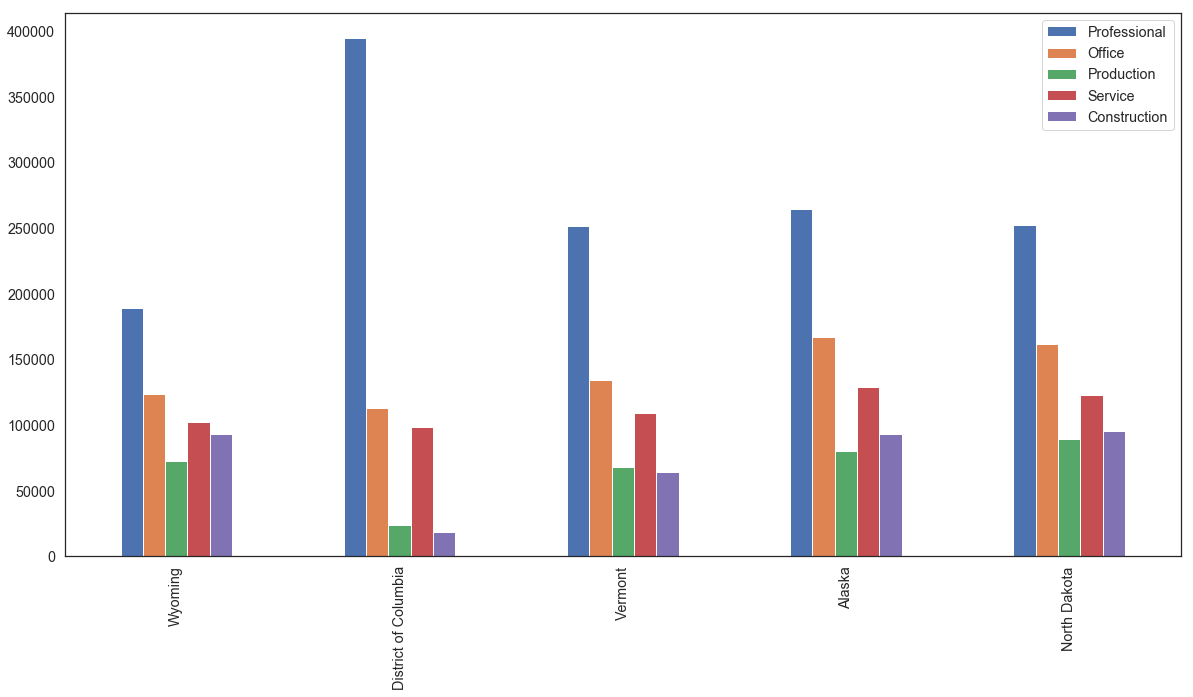

In [434]:
bottom_job_cit = bottom_citizen[['State', 'Professional', 'Office', 'Production', 'Service', 'Construction']]
# job_subset

p1 = bottom_job_cit.plot.bar(figsize=(20,10))
p1.set_xticklabels(bottom_job_cit["State"], rotation=90)

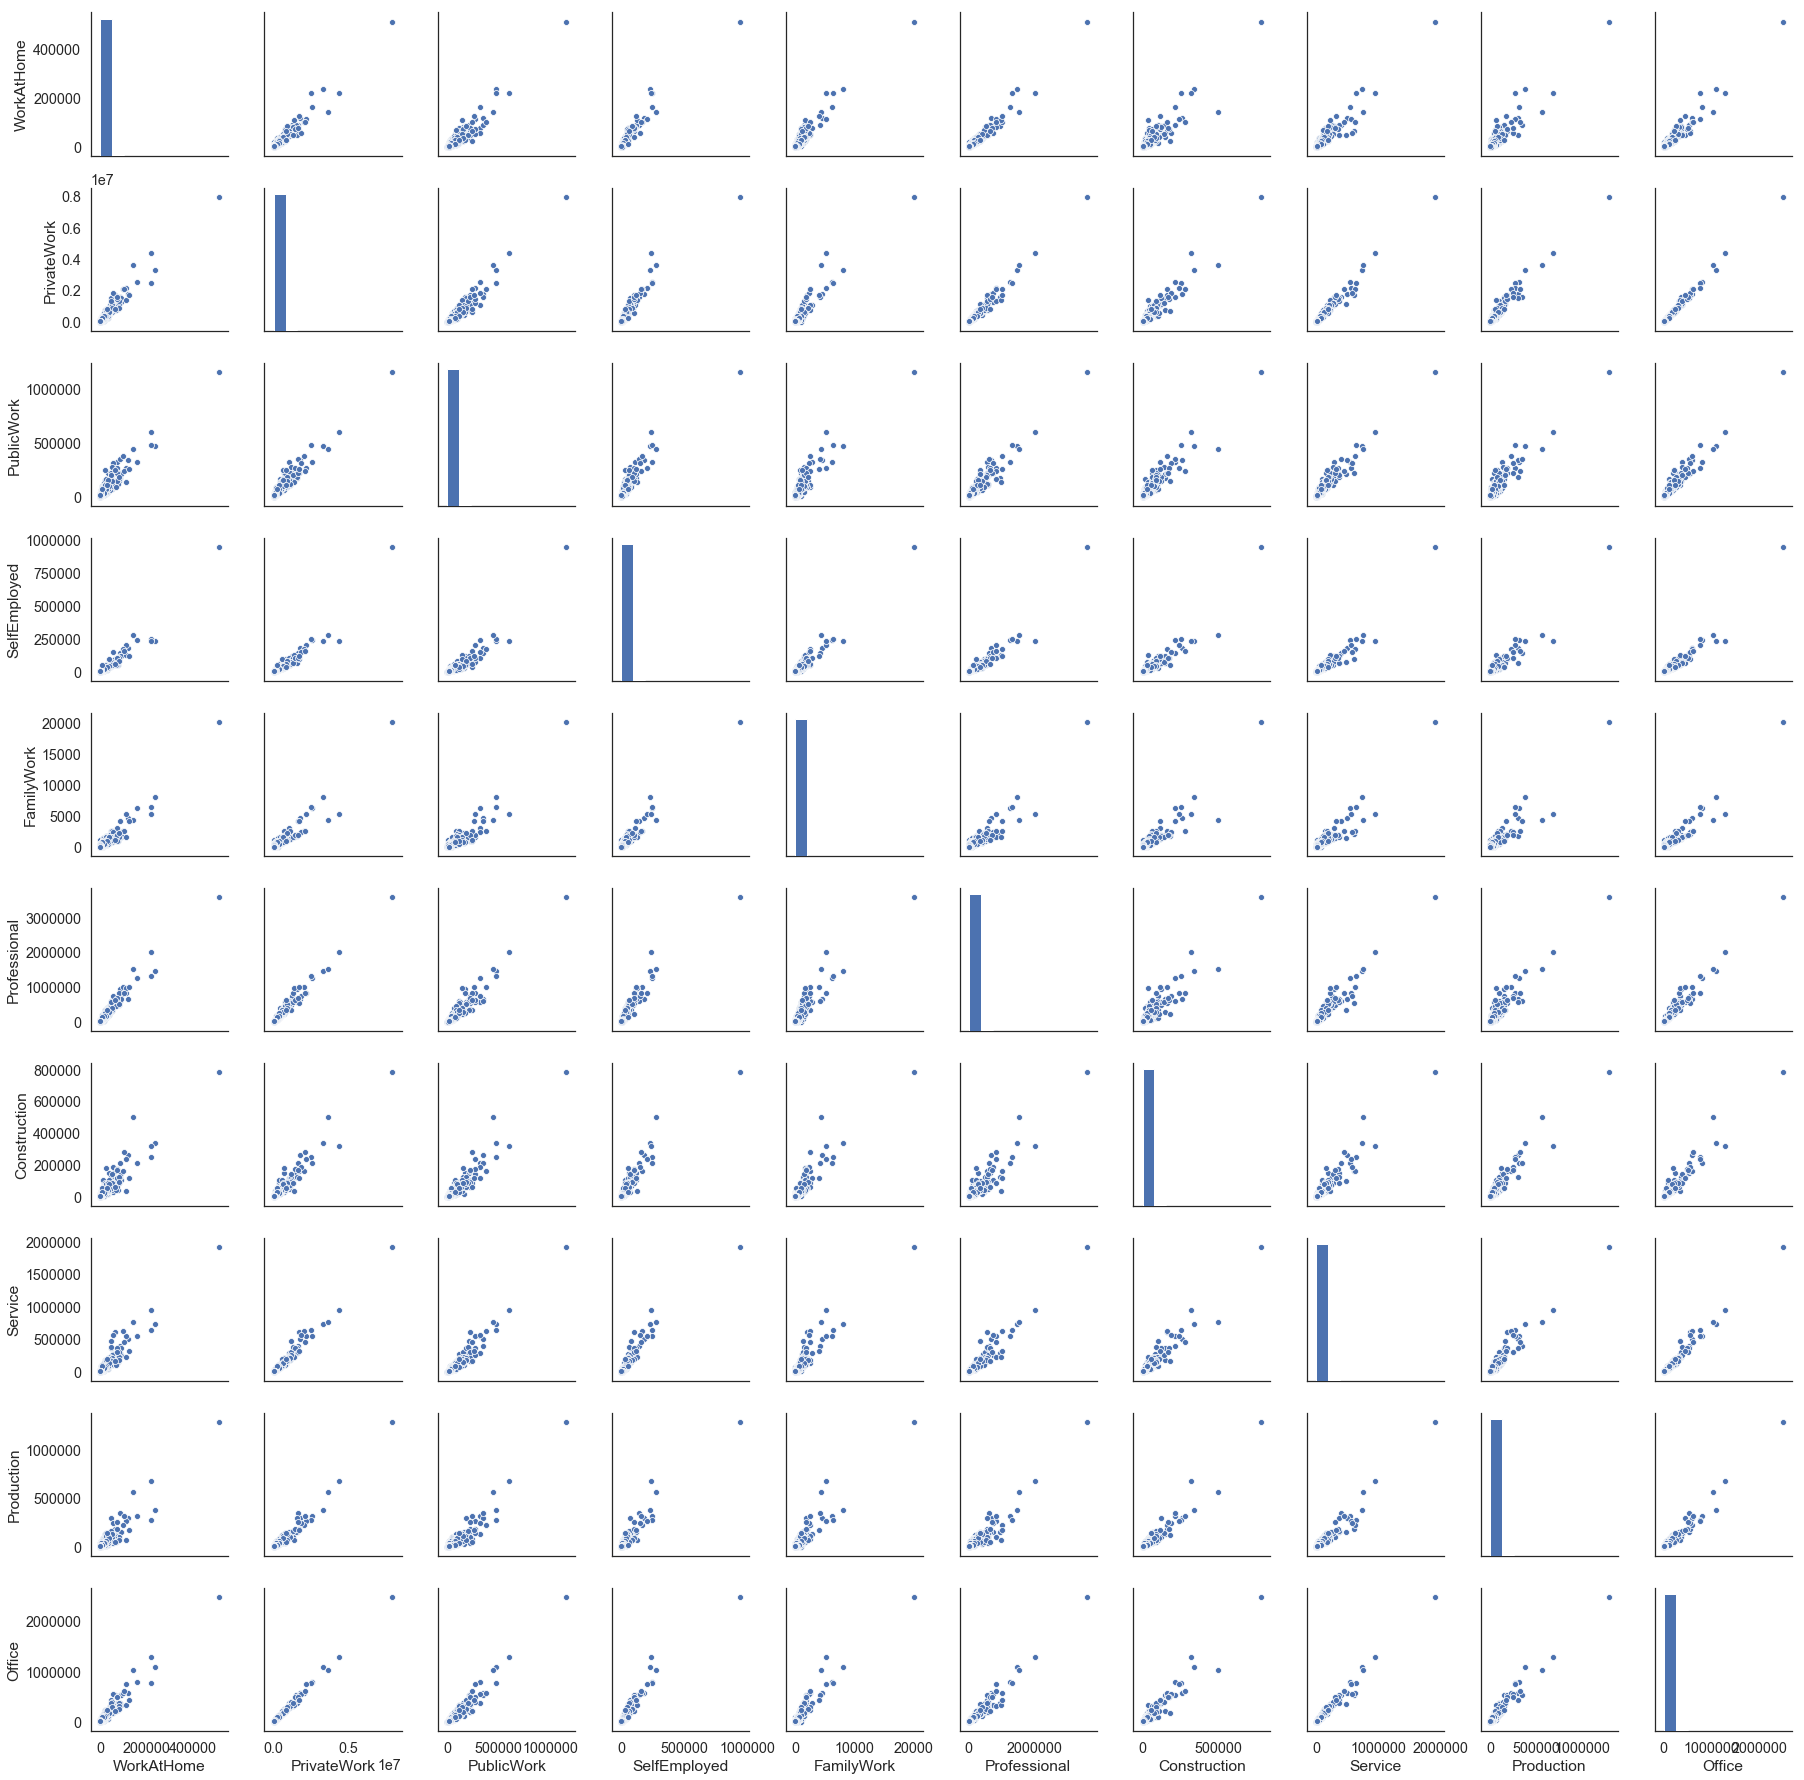

In [437]:
career_sector = ["WorkAtHome", "PrivateWork", "PublicWork", "SelfEmployed", "FamilyWork", "Professional", "Construction", "Service", "Production", "Office"]

sns.pairplot(us_census_df[career_sector])
del career_sector

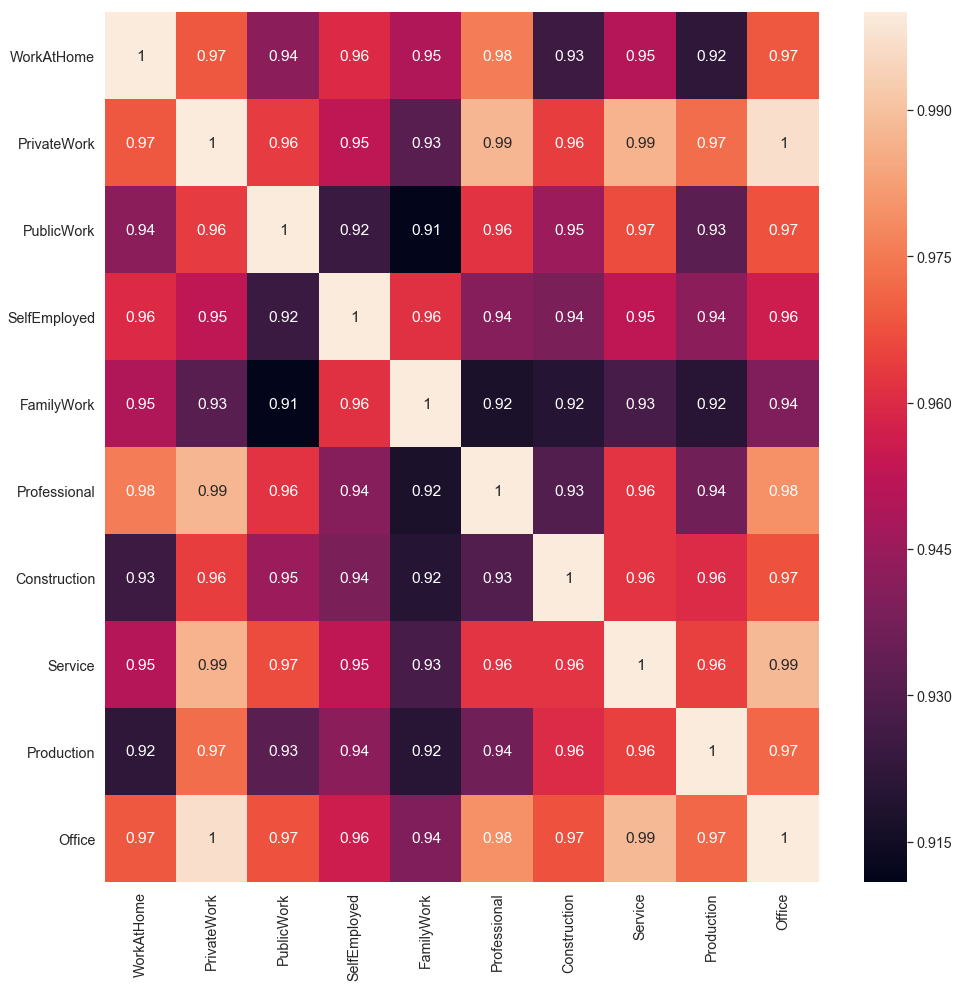

In [446]:
career_df = us_census_df[["WorkAtHome", "PrivateWork", "PublicWork", "SelfEmployed", "FamilyWork", "Professional", "Construction", "Service", "Production", "Office"]]
# career_df
var_Corr = career_df.corr()
# plot the heatmap and annotation on it
plt.figure(figsize=(16, 16))
sns.heatmap(var_Corr, xticklabels=var_Corr.columns, yticklabels=var_Corr.columns, annot=True)




### Appendix of Miscellaneous Code ###

In [338]:
county = us_census_df[['State','County']].groupby('State').agg('count')
county.sort_values('County', ascending = 0)

,County
State,
Texas,254
Georgia,159
Virginia,133
Kentucky,120
Missouri,115
Kansas,105
Illinois,102
North Carolina,100
Iowa,99


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51]), <a list of 52 Text xticklabel objects>)

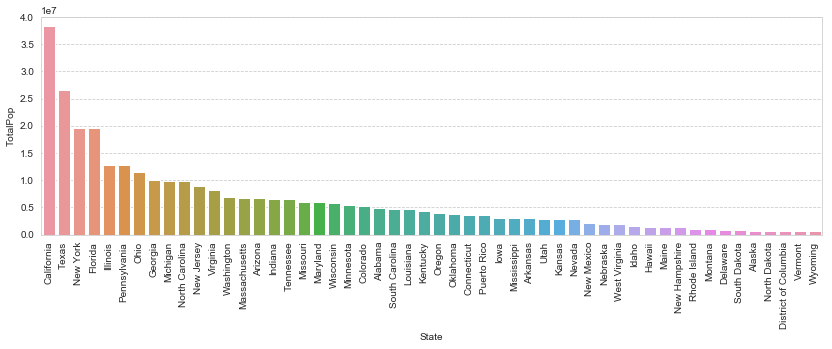

In [339]:
fig, ax = plt.subplots(figsize=(14,4))
fig = sns.barplot(x=state_grouping['State'], y=state_grouping['TotalPop'], data=state_grouping)
fig.axis(ymin=0, ymax=40000000)
plt.xticks(rotation=90)